In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

# Set the backend to TkAgg for interactive plotting
plt.switch_backend('TkAgg')

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.09-23h22m57s-10s_no_lp_filter_just_median.csv", sep=',')
# print(df)

# Separate features and target
x = df[['current']]
y = df[['rgb unique combination']]
# print(x, y)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a support vector classifier object
clf = svm.SVC(kernel='poly', degree=4)  # You can experiment with different kernels

# Train the SVM model
clf.fit(x_train, y_train)

# Make predictions on unseen data
predictions = clf.predict(x_test)

# Evaluate the model (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

/home/cas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


KeyError: "None of [Index(['rgb unique combination'], dtype='object')] are in the [columns]"


Accuracy: 0.5539906103286385


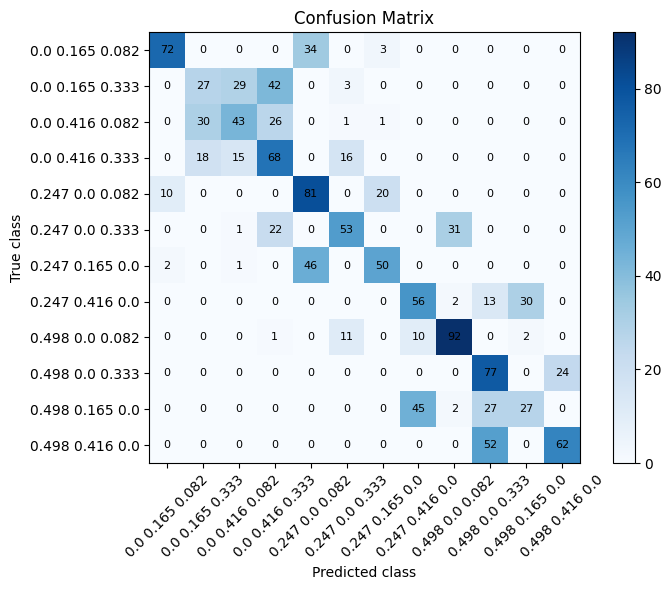

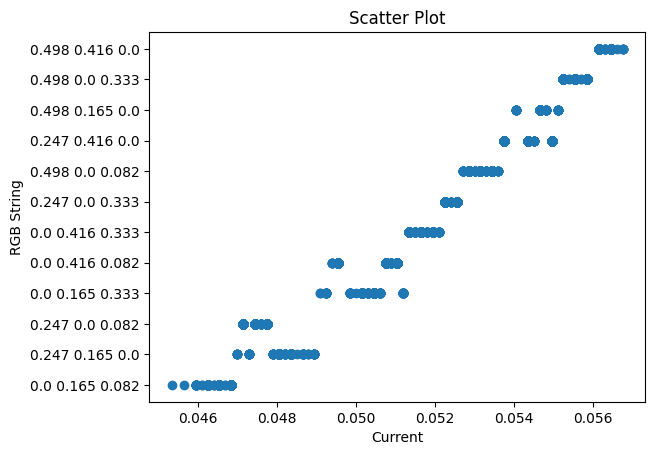

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.09-23h22m57s-10s_no_lp_filter_just_median.csv", sep=',')
# print(df)

df = df.sort_values(by='current')

# Create a list with current and RGB values as a string
x = []
y = []
for index, row in df.iterrows():
  rgb_string = ' '.join([str(val) for val in row[['R', 'G', 'B']]])  # Join RGB values with spaces
  x.append([row['current']])
  y.append(rgb_string)
  
# print(x)
# print(y)

# # Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# print('x_train:'); print(x_train[:5])
# print('y_train:'); print(y_train[:5])
# print('x_test:'); print(x_test[:5])
# print('y_test:'); print(y_test[:5])

# Create a decision tree classifier object
clf = tree.DecisionTreeClassifier()

# Train the decision tree model
clf.fit(x_train, y_train)

# Make predictions on unseen data
predictions = clf.predict(x_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize confusion matrix (using matplotlib)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Adjust colormap as desired
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)  # Rotate class labels for readability
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
  for j in range(len(cm[i])):
    plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


plt.scatter(x, clf.predict(x))
plt.xlabel('Current')
plt.ylabel('RGB String')
plt.title('Scatter Plot')
plt.show()


Accuracy: 0.9084507042253521


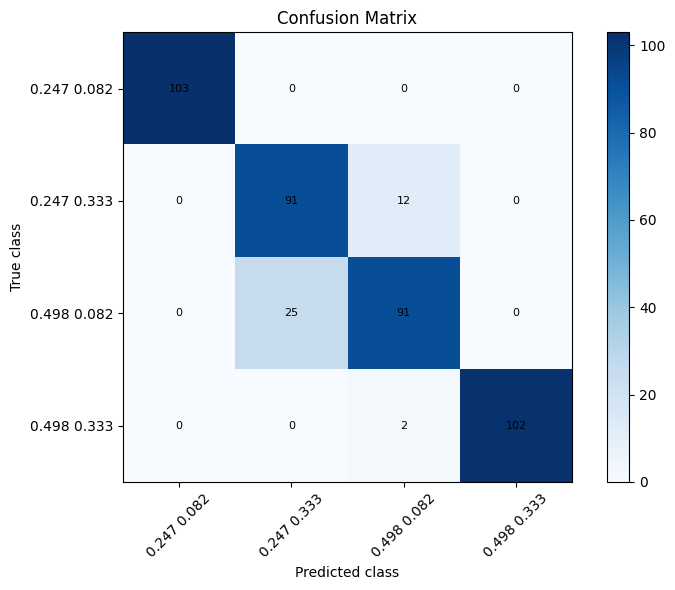

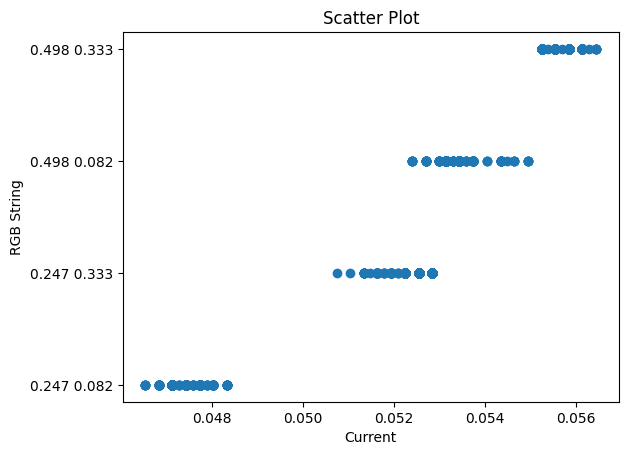

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.09-23h22m57s-10s_no_lp_filter_just_median.csv", sep=',')
# print(df)

# Order by current
df = df.sort_values(by='current')

# Remove middle values
# df = df[(df['R'] != 0.247) & (df['G'] != 0.165) & (df['B'] != 0.082)]
# df = df[(df['R'] != 0.247) & (df['G'] == 0.0) & (df['B'] != 0.082)]
df = df[(df['G'] == 0.0)]

# Create a list with current and RGB values as a string
x = []
y = []
for index, row in df.iterrows():
  # rgb_string = ' '.join([str(val) for val in row[['R', 'G', 'B']]])  # Join RGB values with spaces
  rgb_string = ' '.join([str(val) for val in row[['R', 'B']]])
  x.append([row['current']])
  y.append(rgb_string)
  
# print(x)
# print(y)

# # Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# print('x_train:'); print(x_train[:5])
# print('y_train:'); print(y_train[:5])
# print('x_test:'); print(x_test[:5])
# print('y_test:'); print(y_test[:5])

# Create a decision tree classifier object
clf = tree.DecisionTreeClassifier()

# Train the decision tree model
clf.fit(x_train, y_train)

# Make predictions on unseen data
predictions = clf.predict(x_test)

# Evaluate the model (accuracy in this case)
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize confusion matrix (using matplotlib)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Adjust colormap as desired
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)  # Rotate class labels for readability
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
  for j in range(len(cm[i])):
    plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


plt.scatter(x, clf.predict(x))
plt.xlabel('Current')
plt.ylabel('RGB String')
plt.title('Scatter Plot')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set the backend to TkAgg for interactive plotting
plt.switch_backend('TkAgg')

# Read the data file
df = pd.read_csv("./labeled_dataset-rgb_combinations_labeled.csv", sep=',')

# Separate features and target
X = df[['current']]
y = df[['rgb unique combination']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print a sample of training data (optional)
print('x_train:'); print(X_train.head(5))
print('y_train:'); print(y_train.head(5))

# **Create training data list (combine features and labels)**
train_data = [(X_train.iloc[i].values.tolist(), y_train.iloc[i].values[0]) for i in range(len(X_train))]

# Create a random forest classifier object
clf = RandomForestClassifier()

# Train the random forest model
clf.fit(X_train, y_train.values.ravel())  # ravel needed for flat array

# Make predictions on unseen data
predictions = clf.predict(X_test)

# Evaluate the model (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


x_train:
       current
421   0.470126
2344  0.357288
3729  0.343841
3331  0.224236
1600  0.115426
y_train:
      rgb unique combination
421                        7
2344                      17
3729                      17
3331                      15
1600                       2

Accuracy: 0.5391743892165122


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set the backend toimport numpy as np TkAgg for interactive plotting
plt.switch_backend('TkAgg')

# Read the data file
df = pd.read_csv("./labeled_dataset-rgb_combinations_labeled.csv", sep=',')

# Separate features and target
X = df[['current']]
y = df[['rgb unique combination']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print a sample of training data (optional)
print('x_train:'); print(X_train.head(5))
print('y_train:'); print(y_train.head(5))

# **Create training data list (combine features and labels)**
train_data = [(X_train.iloc[i].values.tolist(), y_train.iloc[i].values[0]) for i in range(len(X_train))]

# Create a k-NN classifier object
clf = KNeighborsClassifier(n_neighbors=27)  # You can adjust n_neighbors

# Train the k-NN model
clf.fit(X_train, y_train.values.ravel())  # ravel needed for flat array

# Make predictions on unseen data
predictions = clf.predict(X_test)

# Evaluate the model (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)


x_train:
       current
2627  0.522029
5652  0.411612
2002  0.247676
5851  0.407911
1653  0.474458
y_train:
      rgb unique combination
2627                      18
5652                      20
2002                      15
5851                      19
1653                       5

Accuracy: 0.636899747262005


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Set the backend to TkAgg for interactive plotting
plt.switch_backend('TkAgg')

# Read the data file
df = pd.read_csv("./labeled_dataset-rgb_combinations_labeled.csv", sep=',')

# Separate features (assuming 'current' column holds the features)
X = df[['current']]

# No need to split data for k-means clustering (it's unsupervised)

# **K-means clustering**
kmeans = KMeans(n_clusters=27)  # You can adjust the number of clusters (k)
kmeans.fit(X)

# Make predictions on unseen data
predictions = clf.predict(X_test)

# Evaluate the model (accuracy in this case)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Print a sample of data with cluster labels (optional)
print("Sample data with cluster labels:")
for i in range(5):
  print(f"Data point: {X.iloc[i].values[0]} - Cluster: {cluster_labels[i]}")

# Visualize clusters (optional)
plt.scatter(X, cluster_labels)
plt.xlabel("Current values")
plt.ylabel("Cluster")
plt.title("K-means Clustering")
plt.show()



Accuracy: 0.636899747262005
Sample data with cluster labels:
Data point: 0.124718 - Cluster: 17
Data point: 0.33641 - Cluster: 8
Data point: 0.08422 - Cluster: 13
Data point: 0.465096 - Cluster: 12
Data point: 0.447505 - Cluster: 5
